In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")

In [5]:
data_df = pd.DataFrame(data)

In [6]:
data_df.shape

(10000, 12)

In [7]:
data_df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

#### Data Set has Country and Gender which are of object datatype

In [8]:
data_df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [10]:
data_df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
## Checking for the Unique values in the Data Set
data_df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [12]:
#target variable is Churn
data_df['churn'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: churn
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [13]:
data_df['churn'].describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [14]:
data_df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

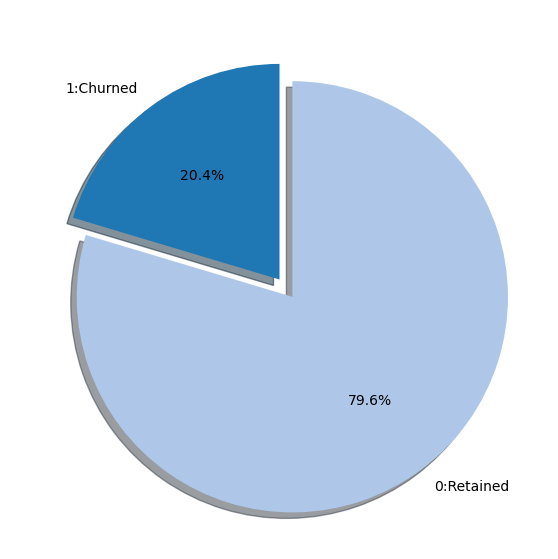

In [15]:
colors=sns.color_palette("tab20")
labels = '1:Churned', '0:Retained'
sizes = [data_df.churn[data_df['churn']==1].count(), data_df.churn[data_df['churn']==0].count()]
explode = (0, 0.1)
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 10}, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.show()

We see that the 79.6% of the churn data is for 0 while 20.4% is for 1

**The data is Highly imbalanced**

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.

NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. 

In our dataseet the model is oversampled on the churn target variable towards

In [16]:
data_df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### our data has no missing values 
Handling missing data is a crucial step in the data preprocessing phase of machine learning in Python. Missing data can lead to biased models and incorrect predictions, so it's important to address this issue effectively. 

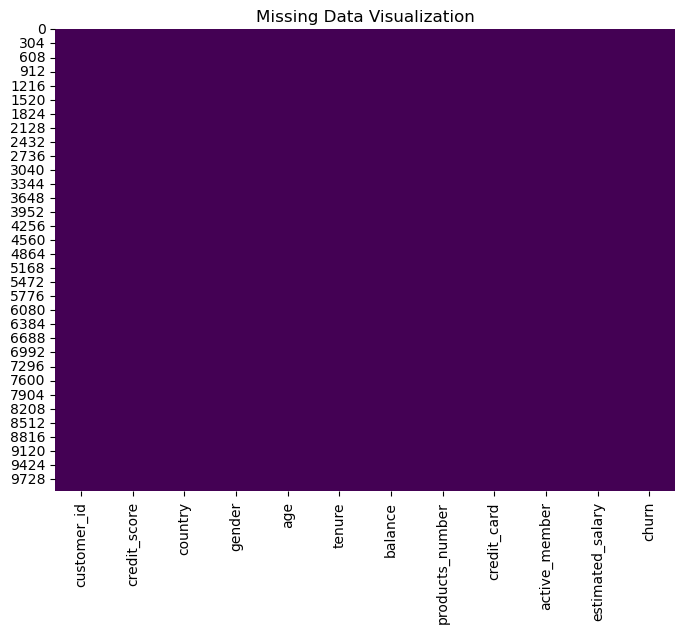

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()# there are no missing values in the dataset

**We see that there are no missing values in the data from the above visual**

### Ways to handle Missing data
1)Replacing Missing Data:
You can replace missing values with a specific value, such as the mean, median, or a constant value.
2)Removing Rows with Missing Data(may be a costly affair)
This is a simple approach, but it may lead to a significant loss of data. You can use the dropna() method to remove rows with missing values.
3)Interpolation:
For time-series data, you can use interpolation methods like linear or polynomial interpolation to estimate missing values.

In [18]:
column = data_df.columns
column

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

<Axes: >

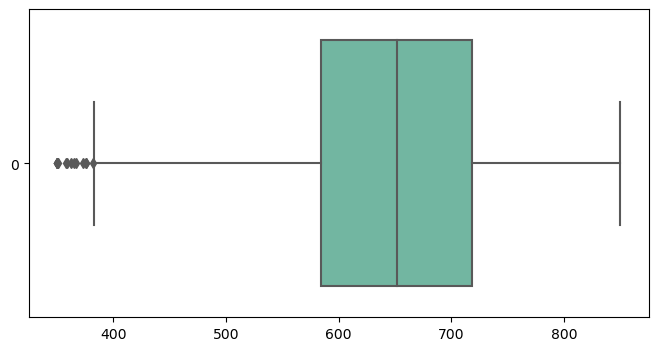

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data_df['credit_score'], orient='h', palette='Set2')

<Axes: xlabel='credit_score'>

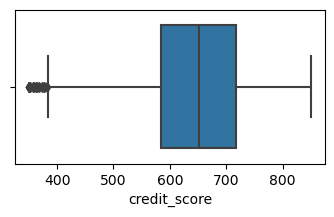

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(4, 2))
sns.boxplot(x='credit_score', data=data_df, ax=axs)

<Axes: xlabel='age'>

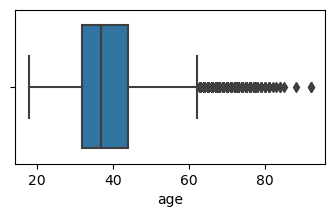

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(4, 2))
sns.boxplot(x='age', data=data_df, ax=axs)

In [22]:
data_df['balance'].value_counts()

balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64

In [23]:
data_df['credit_score'].value_counts()

credit_score
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [24]:
column

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

<Axes: xlabel='credit_card', ylabel='count'>

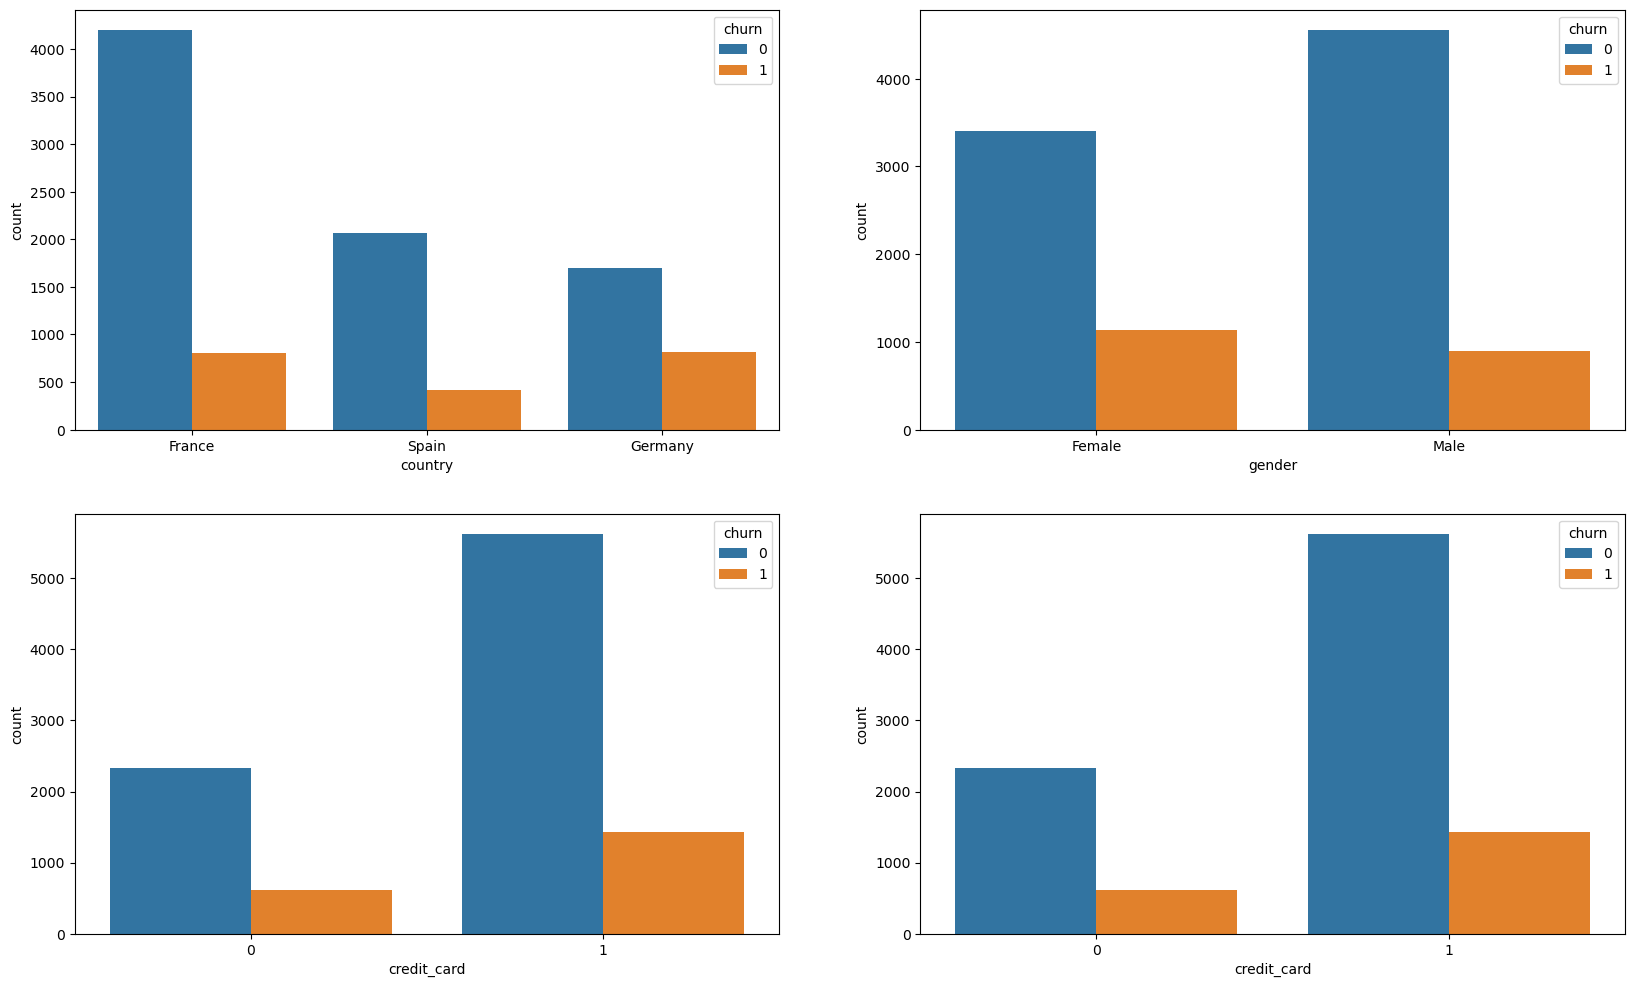

In [25]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='country', hue = 'churn',data = data_df, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'churn',data = data_df, ax=axarr[0][1])
sns.countplot(x='credit_card', hue = 'churn',data = data_df, ax=axarr[1][0])
sns.countplot(x='credit_card', hue = 'churn',data = data_df, ax=axarr[1][1])

In [26]:
data_df['balance']

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: balance, Length: 10000, dtype: float64

In [27]:
#print(data_df['data_df'].value_counts(normalize=True)*100)

In [28]:
data_df = data_df.drop('customer_id',axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


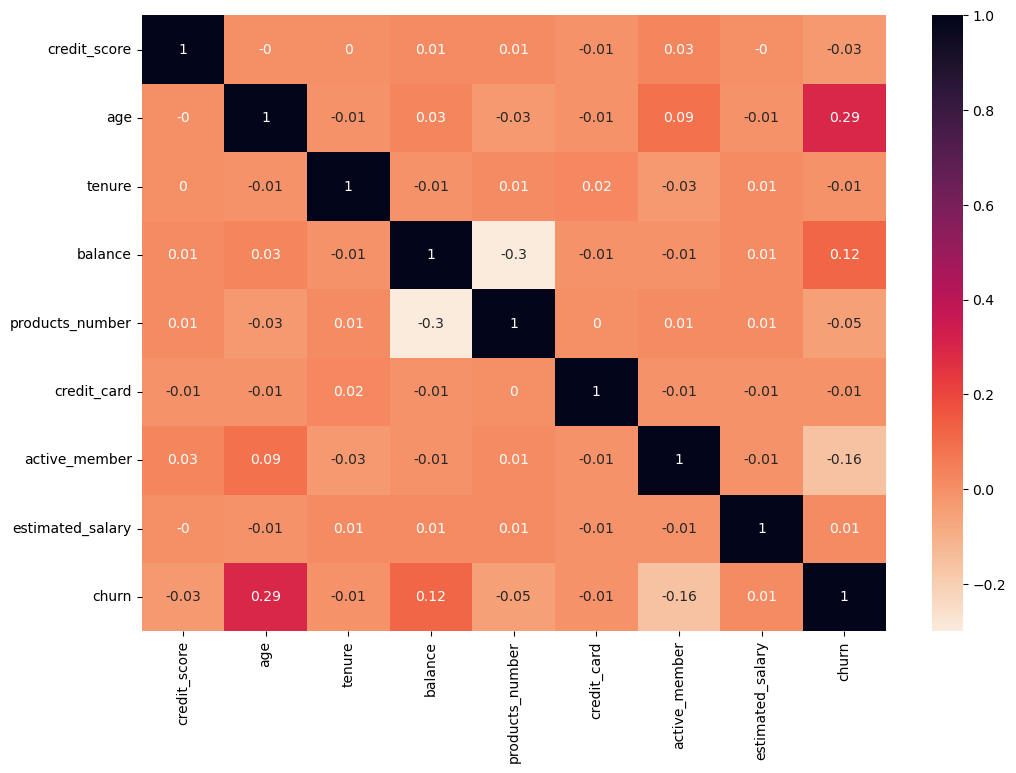

In [29]:
c_map=sns.color_palette("rocket_r", as_cmap=True)
correlation = data_df.corr(numeric_only=True).round(2)
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = c_map)
plt.show()

In [30]:
column

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

**Analyzing the numerical features**

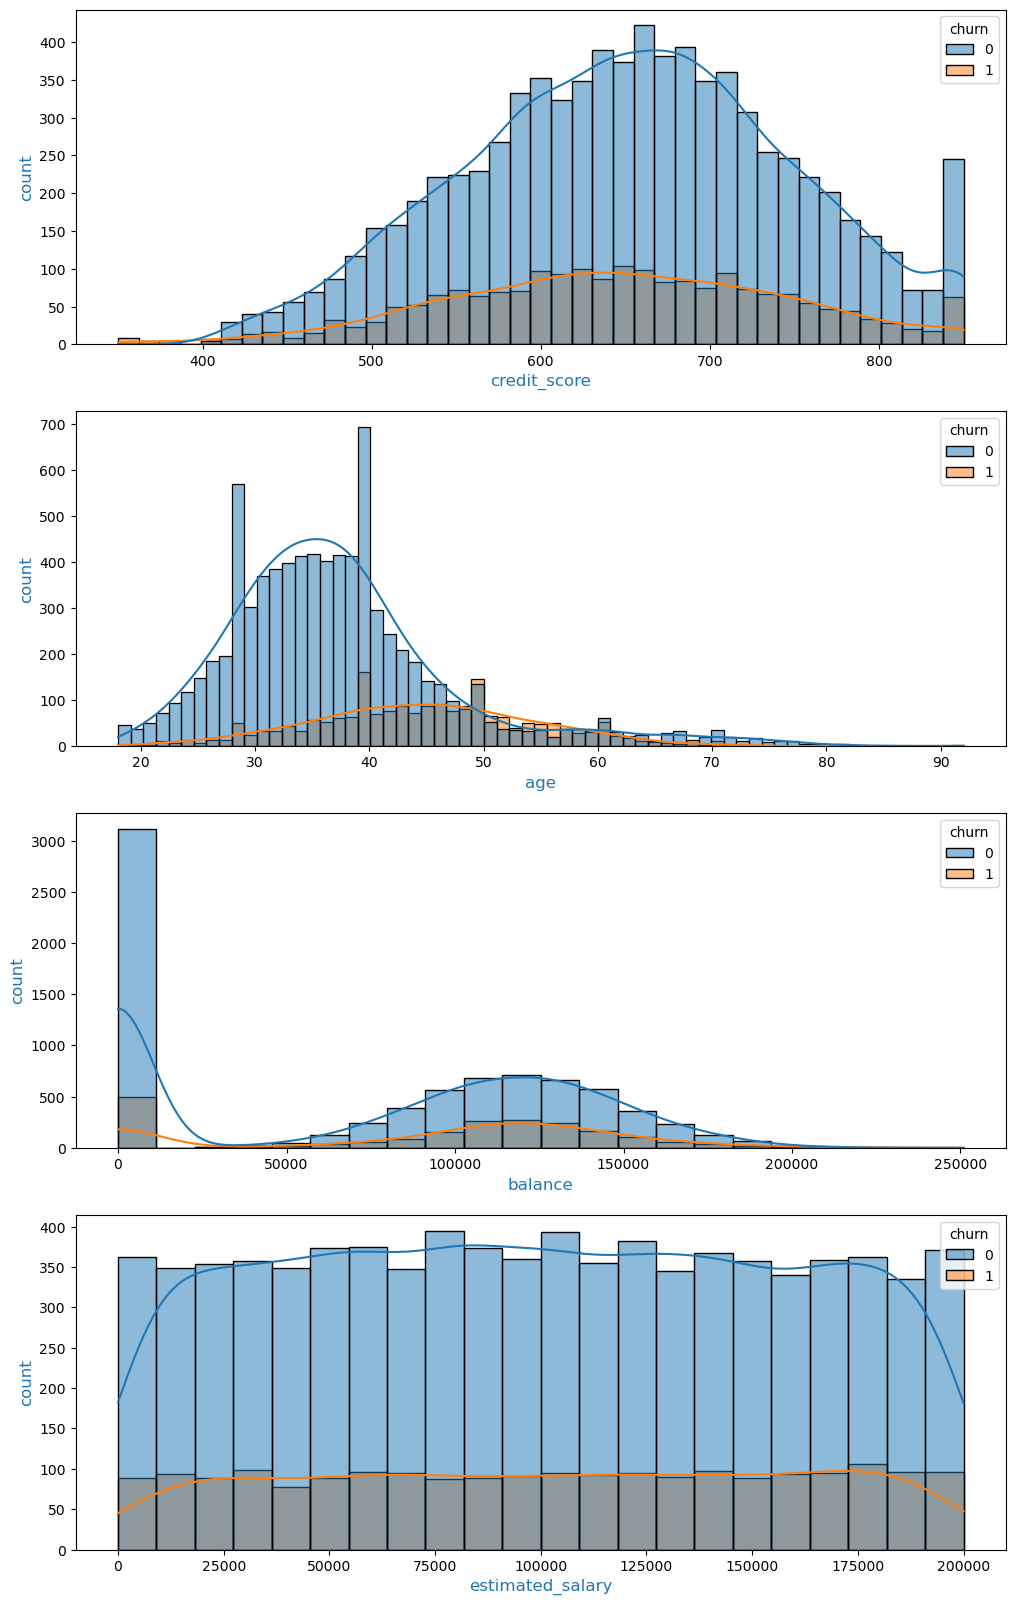

In [31]:
plt.figure(figsize=(12,20))

plt.subplot(4,1,1)
sns.histplot(data_df, x='credit_score', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('credit_score', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,2)
sns.histplot(data_df, x='age', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('age', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,3)
sns.histplot(data_df, x='balance', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('balance', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,4)
sns.histplot(data_df, x='estimated_salary', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('estimated_salary', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.show()

**Analyzing the categorical features**

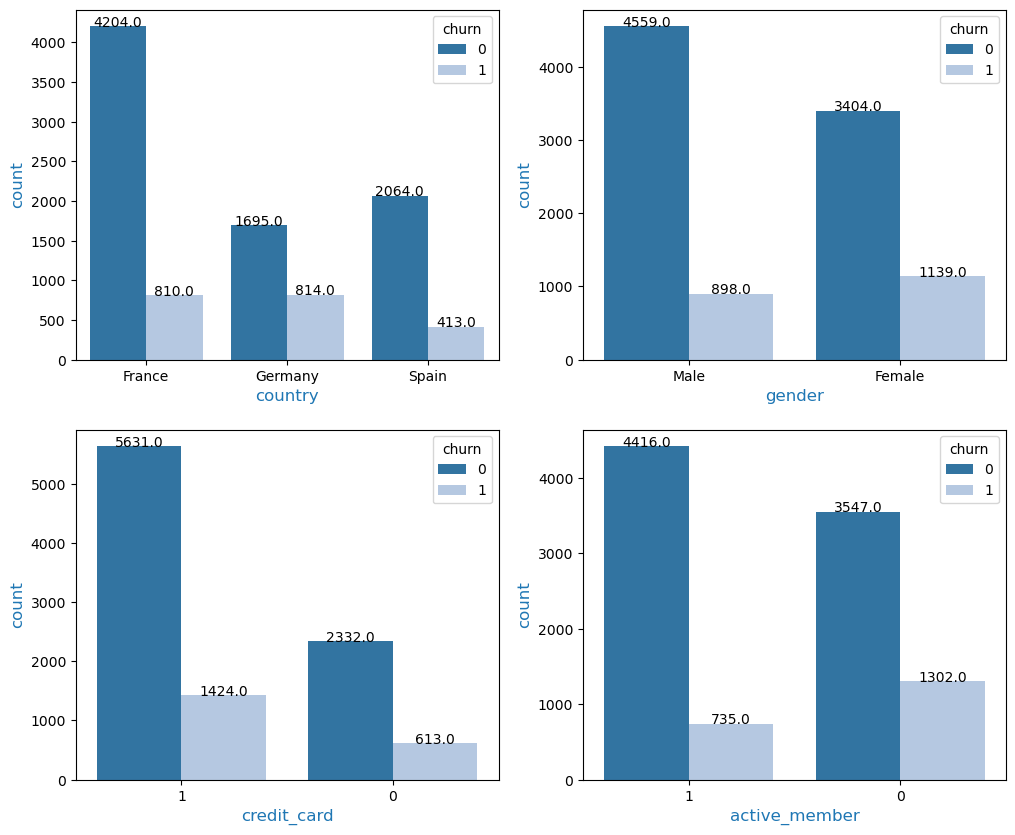

In [32]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
cplot = sns.countplot(data=data_df, x='country', hue='churn', order=data_df['country'].value_counts().index, palette=colors)
plt.xlabel('country', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,2)
cplot = sns.countplot(data=data_df, x='gender', hue='churn', order=data_df['gender'].value_counts().index, palette=colors)
plt.xlabel('gender', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,3)
cplot = sns.countplot(data=data_df, x='credit_card', hue='churn', order=data_df['credit_card'].value_counts().index, palette=colors)
plt.xlabel('credit_card', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,4)
cplot = sns.countplot(data=data_df, x='active_member', hue='churn', order=data_df['active_member'].value_counts().index, palette=colors)
plt.xlabel('active_member', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

Germany has the highest number of churners.
Spain has relatively few churners.
Female churners > Male churners.
Most churners have credit cards but are not active members.

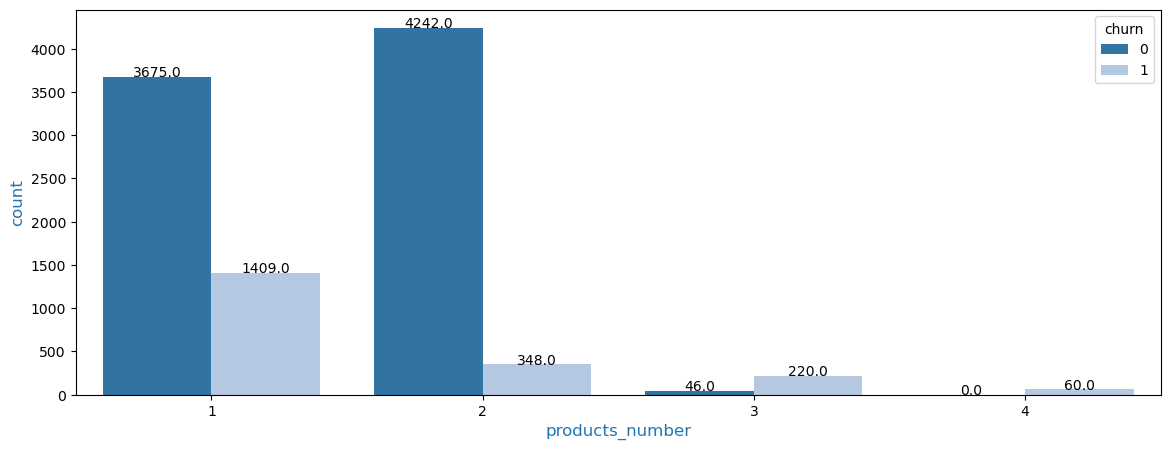

In [33]:
plt.figure(figsize=(14,5))

cplot = sns.countplot(data=data_df, x='products_number', hue='churn', palette=colors)
plt.xlabel('products_number', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.show()

Most customers have only 1 or 2 products.
Most of the non-churners have 2 products.
Most of the churners have 1 product.
Customers having 3,4 products are mostly churners.

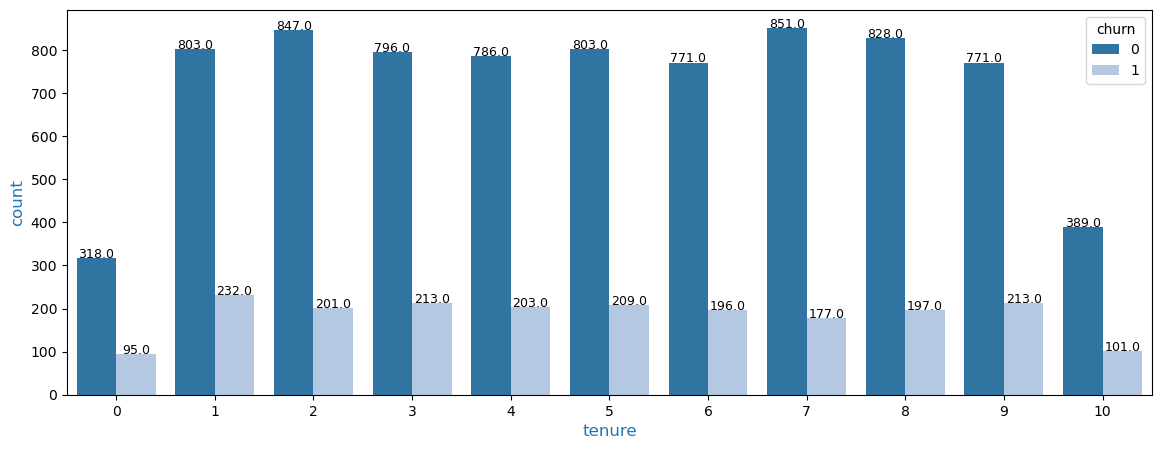

In [34]:
plt.figure(figsize=(14,5))

cplot = sns.countplot(data=data_df, x='tenure', hue='churn', palette=colors)
plt.xlabel('tenure', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 9)

plt.show()

Most churners have a tenure of 1 year.
Only a few customers have a tenure of 0 or 10 years.

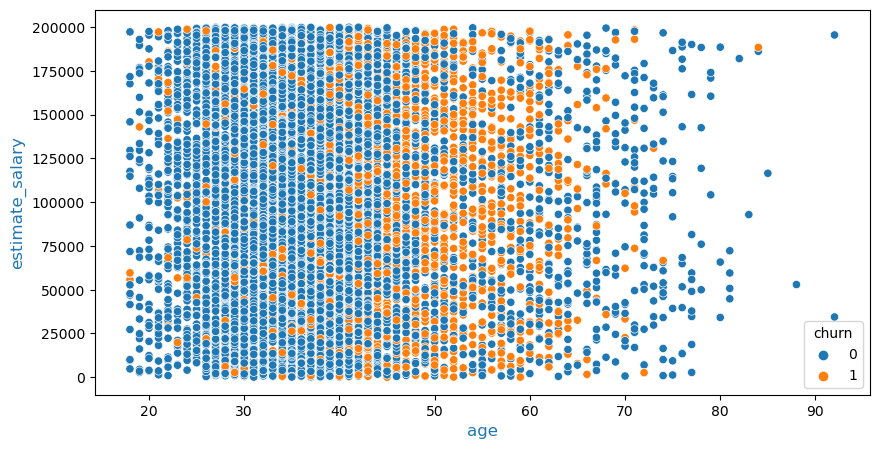

In [35]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=data_df, x='age', y='estimated_salary', hue='churn', palette=[colors[0], colors[2]])
plt.xlabel('age', fontsize=12, color=colors[0])
plt.ylabel('estimate_salary', fontsize=12, color=colors[0])

plt.show()


Most of the churners are of the age between 42 to 61

In [36]:
dfEnc=data_df.copy()

In [37]:
dfEnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [38]:
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [39]:
categorical_columns = ['country','gender']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(dfEnc[categorical_columns])

# Concatenate the one-hot encoded columns to the original dataframe
df_encoded = pd.concat([dfEnc, one_hot_encoded], axis=1)

#Drop original categorical columns
df_encoded.drop(categorical_columns,axis=1,inplace=True)

In [40]:
df_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [41]:
#Transform continuous columns
continuous_columns = ['credit_score','age','tenure','balance','products_number','estimated_salary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[continuous_columns] = scaler.fit_transform(df_encoded[continuous_columns])
df_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,True,False,False,True,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,False,False,True,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,True,False,False,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,True,False,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,False,False,True,True,False


In [42]:
#Train Test Split
X = df_encoded.drop('churn',axis=1)
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [43]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

In [44]:
# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.8139
Average Precision: 0.7269
Average Recall: 0.5928
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.7934
Average Precision: 0.6817
Average Recall: 0.6947
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8609
Average Precision: 0.8186
Average Recall: 0.7135
-----------------------
Classifier: KNN
Average Accuracy: 0.8120
Average Precision: 0.7086
Average Recall: 0.6158
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.8189
Average Precision: 0.7218
Average Recall: 0.6550
-----------------------
Classifier: XGB
Average Accuracy: 0.8492
Average Precision: 0.7795
Average Recall: 0.7157
-----------------------


In [45]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    # plt.figure(figsize=(3,3))
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

#Method to plot AUC-ROC
from sklearn.metrics import roc_curve, auc
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000


---------------------------------------------



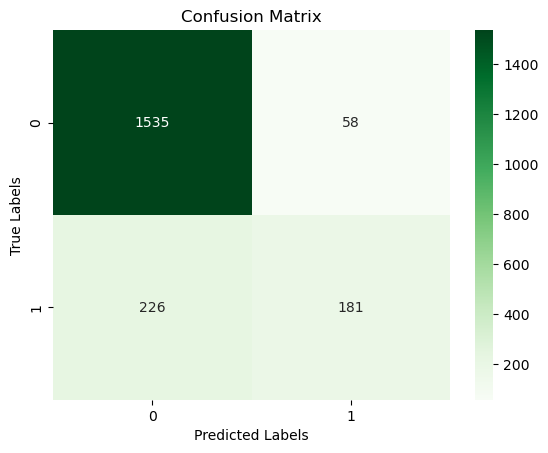

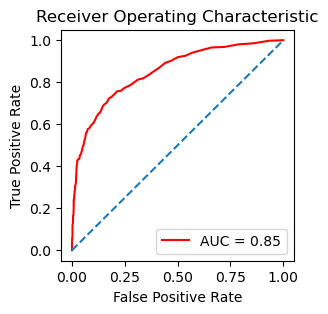

In [46]:
# Creating the Random Forest classifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
RFC.fit(X_train, y_train)

# Making predictions on the test set
y_pred = RFC.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

#Plotting AUC-ROC
y_proba=RFC.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.49      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000


---------------------------------------------



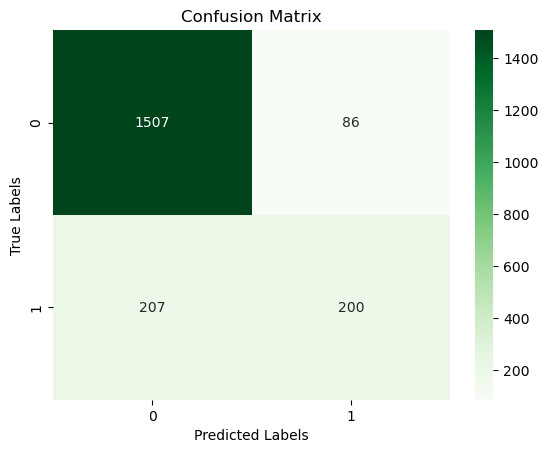

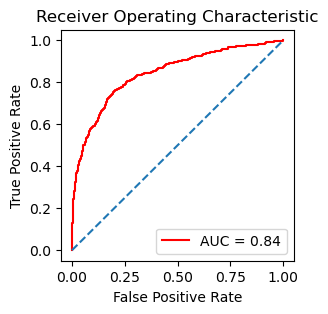

In [47]:
# Creating the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Training the classifier
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

#Plotting AUC-ROC
y_proba=xgb_classifier.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

## Feature Engineering

In [48]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


(-1.0, 5.0)

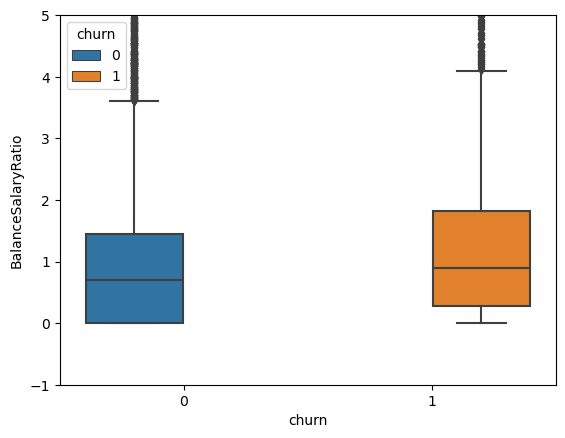

In [49]:
# 1st Attribute - Balance Salary Ratio
data_df['BalanceSalaryRatio'] = data_df.balance/data_df.estimated_salary
sns.boxplot(y='BalanceSalaryRatio',x = 'churn', hue = 'churn',data = data_df)
plt.ylim(-1, 5)

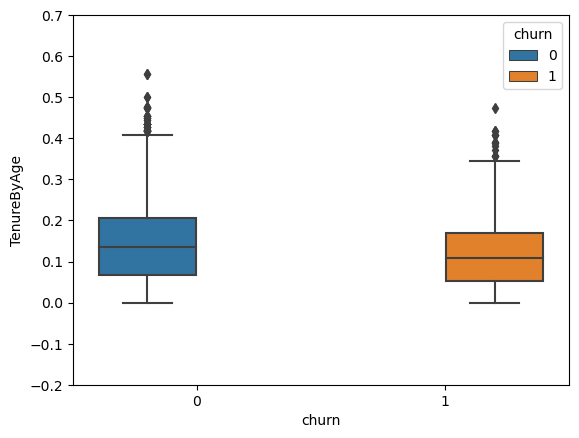

In [50]:
#  2nd Attribute-Tenure By Age
data_df['TenureByAge'] = data_df.tenure/(data_df.age)
sns.boxplot(y='TenureByAge',x = 'churn', hue = 'churn',data = data_df)
plt.ylim(-0.2, 0.7)
plt.show()

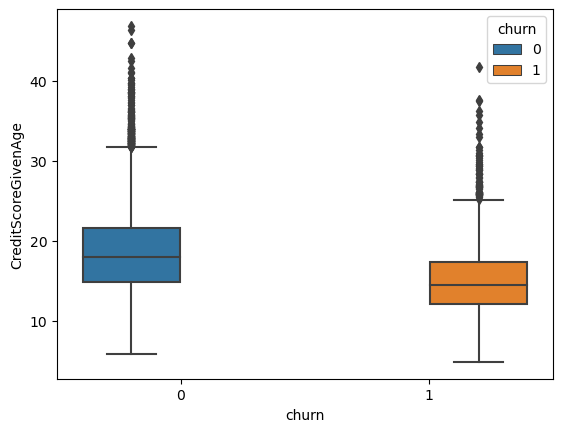

In [51]:
# 3rd Attribute- Credit Score Given Age
data_df['CreditScoreGivenAge'] = data_df.credit_score/(data_df.age)
sns.boxplot(y='CreditScoreGivenAge',x = 'churn', hue = 'churn',data = data_df)
plt.show()

In [52]:
print(data_df.shape)
data_df.head()

(10000, 14)


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [53]:
categorical_columns = ['country','gender']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(data_df[categorical_columns])

# Concatenate the one-hot encoded columns to the original dataframe
df_encoded = pd.concat([data_df, one_hot_encoded], axis=1)

#Drop original categorical columns
df_encoded.drop(categorical_columns,axis=1,inplace=True)

In [54]:
df_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,False,False,True,True,False


In [55]:
#Transform continuous columns
continuous_columns = ['credit_score','age','tenure','balance','products_number','estimated_salary','BalanceSalaryRatio','TenureByAge','CreditScoreGivenAge']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[continuous_columns] = scaler.fit_transform(df_encoded[continuous_columns])

df_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.085714,0.235083,True,False,False,True,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.000070,0.043902,0.237252,False,False,True,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0.000132,0.342857,0.168807,True,False,False,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.046154,0.310859,True,False,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.000150,0.083721,0.354739,False,False,True,True,False


In [56]:
#Train Test Split
X = df_encoded.drop('churn',axis=1)
y = df_encoded['churn']

print(X.shape)
print(y.shape)

(10000, 16)
(10000,)


### Oversampling

In [57]:
from imblearn.over_sampling import SMOTE


In [58]:
# Check for missing values in X and y
print("Missing values in X:", X.isnull().sum())
print("Missing values in y:", y.isnull().sum())

Missing values in X: credit_score           0
age                    0
tenure                 0
balance                0
products_number        0
credit_card            0
active_member          0
estimated_salary       0
BalanceSalaryRatio     0
TenureByAge            0
CreditScoreGivenAge    0
country_France         0
country_Germany        0
country_Spain          0
gender_Female          0
gender_Male            0
dtype: int64
Missing values in y: 0


In [59]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install -U threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [61]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE oversampling to the data
try:
    X_sm, y_sm = smote.fit_resample(X, y)
    print("Oversampling successful.")
    print(y_sm.value_counts())  # Check the value counts of the target labels after oversampling
except Exception as e:
    print(f"Error occurred during oversampling: {e}")

Oversampling successful.
churn
1    7963
0    7963
Name: count, dtype: int64


In [62]:
y_sm.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [63]:
pip install threadpoolctl -U

Note: you may need to restart the kernel to use updated packages.


In [64]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 16)
(2000, 16)
(8000,)
(2000,)


In [65]:
# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Logistic Regression
Average Accuracy: 0.8139
Average Precision: 0.7269
Average Recall: 0.5907
-----------------------
Classifier: Decision Tree
Average Accuracy: 0.7870
Average Precision: 0.6796
Average Recall: 0.6822
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8581
Average Precision: 0.8126
Average Recall: 0.7128
-----------------------
Classifier: KNN
Average Accuracy: 0.8153
Average Precision: 0.7153
Average Recall: 0.6281
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.8181
Average Precision: 0.7277
Average Recall: 0.6251
-----------------------
Classifier: XGB
Average Accuracy: 0.8518
Average Precision: 0.7847
Average Recall: 0.7193
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1593
           1       0.73      0.50      0.59       407

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000


---------------------------------------------



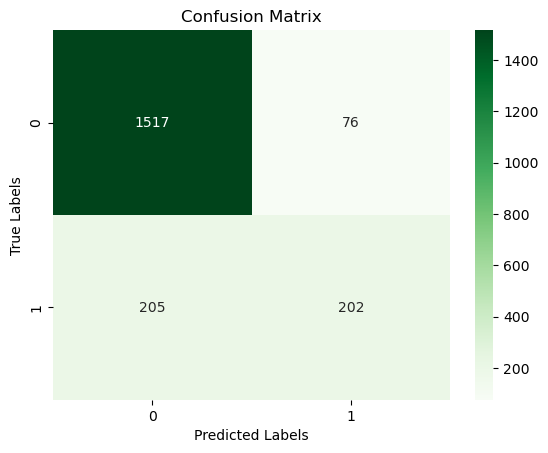

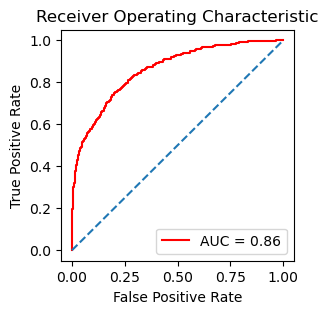

In [66]:
# Create an XGBClassifier model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#Compute Accuracy
evaluate_model(y_test,y_pred)

#Plotting AUC-ROC
y_proba=model.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

## Hypertuning

In [67]:
#Perform GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print Best Parameter
print("Best Parameters: ", grid_search.best_params_)
# Print Best Cross Validation Score
print("Best Cross-Validation Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print ('Training')
# Evaluate best model testing
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_train, y_train)
print("Accuracy on Test Data: ", accuracy)
print(classification_report(y_train, y_train_pred))

print ('')
print ('Testing')
# Evaluate best model testing
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Data: ", accuracy)
print(classification_report(y_test, y_test_pred))

Best Parameters:  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}
Best Cross-Validation Score:  0.8613750000000001
Training
Accuracy on Test Data:  0.871625
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      6370
           1       0.84      0.46      0.59      1630

    accuracy                           0.87      8000
   macro avg       0.86      0.72      0.76      8000
weighted avg       0.87      0.87      0.86      8000


Testing
Accuracy on Test Data:  0.869
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.82      0.46      0.59       407

    accuracy                           0.87      2000
   macro avg       0.85      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



**perform SMOTE oversampling to balance the churn data to achieve higher performance of the model**

In [68]:
#pip install shap

In [69]:
import shap


In [70]:
print(shap.__file__)

C:\Users\LENOVO\anaconda3\Lib\site-packages\shap\__init__.py


In [71]:
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

In [72]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [73]:
X_test.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,country_France,country_Germany,country_Spain,gender_Female,gender_Male
5337,0.930,0.527027,0.5,0.0,0.666667,0,0,0.194668,0.0,0.157895,0.224618,False,False,True,True,False
8732,0.748,0.148649,0.6,0.0,0.333333,0,1,0.323621,0.0,0.372414,0.478409,True,False,False,True,False
3359,0.778,0.567568,0.4,0.0,0.000000,1,1,0.258155,0.0,0.120000,0.177474,False,False,True,False,True
5580,0.532,0.162162,0.2,0.0,0.333333,1,0,0.995535,0.0,0.120000,0.372961,False,False,True,False,True
3485,0.508,0.202703,0.3,0.0,0.000000,1,0,0.210818,0.0,0.163636,0.319898,True,False,False,False,True


In [74]:
rf_clf.fit(X_train, y_train)
# Make prediction on the testing data
y_pred = rf_clf.predict(X_test)
# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1779
           1       0.43      0.79      0.55       221

    accuracy                           0.86      2000
   macro avg       0.70      0.83      0.74      2000
weighted avg       0.91      0.86      0.88      2000



In [75]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(X_test)

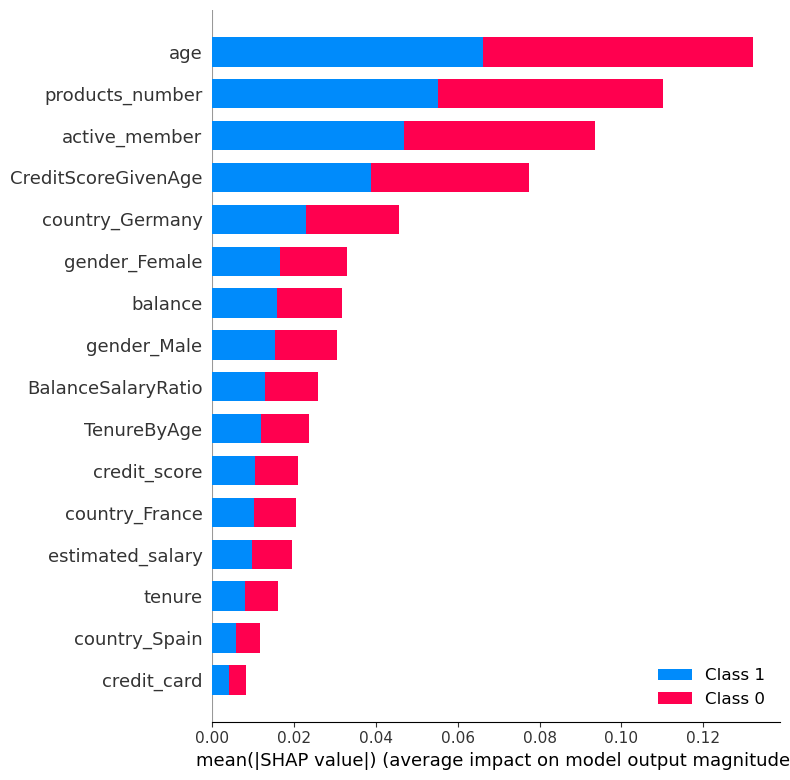

In [76]:
shap.summary_plot(shap_values, X_test)

### Observations from the model
<ol>
<br><p><li>We can observe that the red and blue colors occupy half of the horizontal rectangles for each class. This means that each feature has an equal impact on the classification of both churn (label=1) and do-not churn(label=0) cases.
<br><p><li>However age, products_number and active_member are the first three features with the most predictive power.
<br><p><li>On the other country_France, estimated_salary,tenure, country_Spain and credit_card do not contribute as much as the first three features.
</ol>

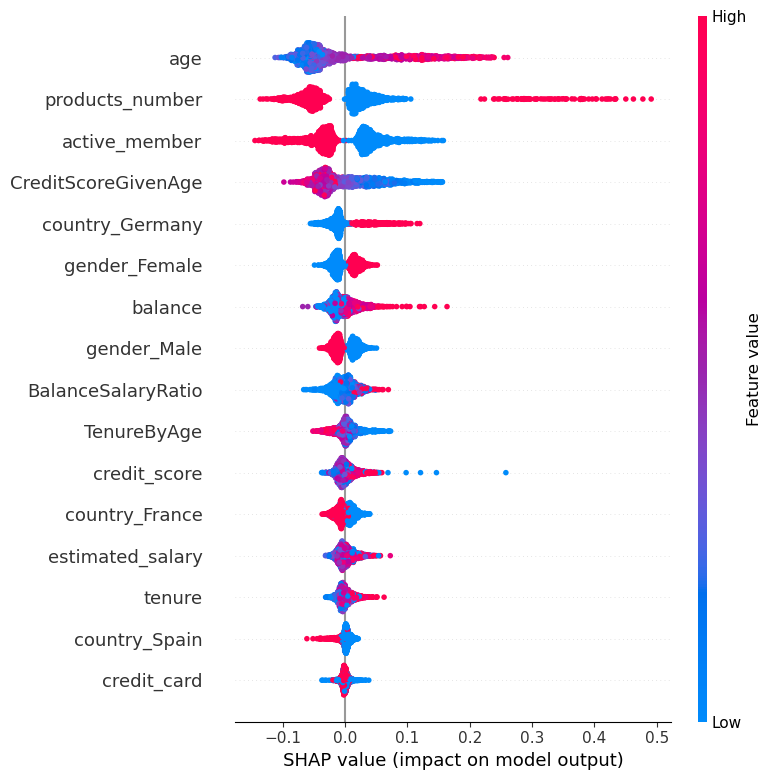

In [77]:
shap.summary_plot(shap_values[1], X_test)

In [78]:
# import shap
# import xgboost as xgb

# # Create an XGBoost classifier
# xgb_classifier = xgb.XGBClassifier()

# try:
#     # Train the XGBoost classifier
#     xgb_classifier.fit(X, y)
#     print("XGBoost Classifier training successful.")

#     # Create a SHAP explainer
#     explainer = shap.Explainer(xgb_classifier, X)

#     # Calculate SHAP values
#     shap_values = explainer(X)

#     # Visualize SHAP summary plot
#     shap.summary_plot(shap_values, X)
    
# except Exception as e:
#     print(f"Error occurred during XGBoost Classifier training: {e}")

In [79]:
#pip install joblib
import joblib

In [80]:
# save the model to disk
joblib.dump(rf_clf, "rf_model.sav")

['rf_model.sav']

In [81]:
pip install pickle5

  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [17 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\pickle5
  copying pickle5\pickle.py -> build\lib.win-amd64-cpython-311\pickle5
  copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-311\pickle5
  copying pickle5\__init__.py -> build\lib.win-amd64-cpython-311\pickle5
  creating build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-311\pickle5\test
  copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-311\pickle5\test
  running build_ext
  building 'pickle5._pickle' extension
  error: Mi

In [82]:
from pickle import dump

In [83]:
dump(rf_clf, open('rf_clf.pkl','wb'))